In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('C:\\Users\\pc\\Desktop\\jupyter_notebook\\salary_predict.csv')

In [4]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [5]:
df.isna().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [6]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 14.0+ KB


In [8]:
df.shape

(397, 6)

In [9]:
df['salary'].value_counts()#categorical data

92000     5
72500     4
74000     4
105000    3
101000    3
         ..
76840     1
83001     1
113278    1
155500    1
81035     1
Name: salary, Length: 371, dtype: int64

In [10]:
df['sex'].value_counts()#categorical data

Male      358
Female     39
Name: sex, dtype: int64

In [11]:
df['rank'].value_counts()#categorical data

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

In [12]:
df['discipline'].value_counts()#categorical data

B    216
A    181
Name: discipline, dtype: int64

In [13]:
#remove null value

In [14]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [15]:
#no null value in our data

In [16]:
#categorical data convert into numericale data by using label encoder

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder() 

In [19]:
df['sex'] = le.fit_transform(df['sex'])

In [20]:
le.inverse_transform([0,1])

array(['Female', 'Male'], dtype=object)

In [21]:
ld = LabelEncoder()

In [22]:
df['rank'] = ld.fit_transform(df['rank'])

In [23]:
ld.inverse_transform([0,1,2])

array(['AssocProf', 'AsstProf', 'Prof'], dtype=object)

In [24]:
lc = LabelEncoder()

In [25]:
df['discipline'] = lc.fit_transform(df['discipline'])

In [26]:
lc.inverse_transform([0,1])

array(['A', 'B'], dtype=object)

In [27]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500


In [28]:
from scipy.stats import skew

rank
-1.146809479700352


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


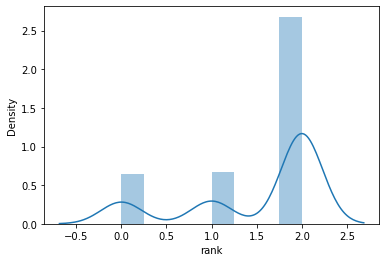

discipline
-0.1770116626350349


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


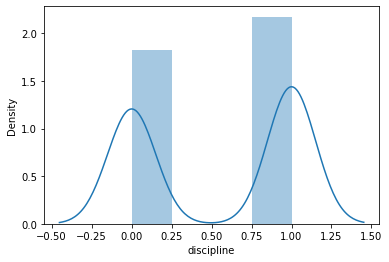

yrs.since.phd
0.29974153157458827


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


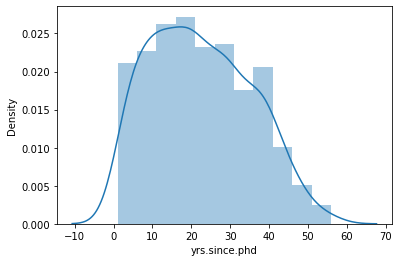

yrs.service
0.6481088240680349


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


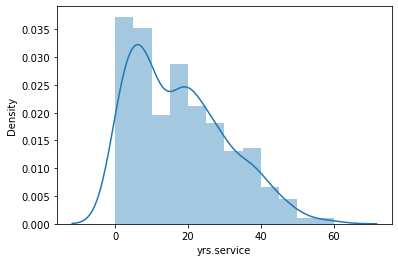

sex
-2.6997084522172408


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


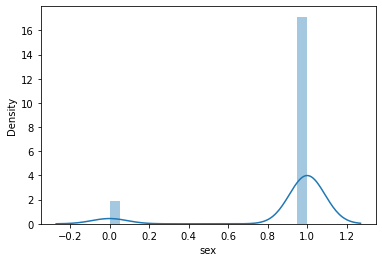

salary
0.7118657337591157


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


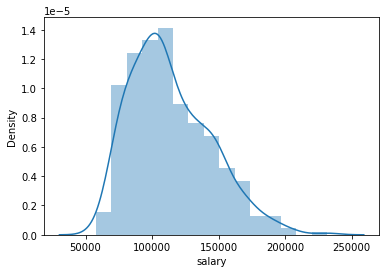

In [29]:
for row in df:
    print(row)
    print(skew(df[row]))
    plt.figure()
    sns.distplot(df[row])
    plt.show()

In [30]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

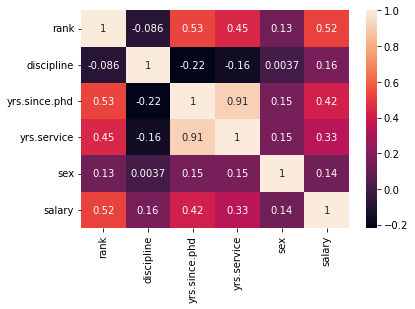

In [31]:
sns.heatmap(df.corr(),annot=True)

In [32]:
x = df.drop(['salary'],axis=1)
y = df['salary']

In [33]:
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2,1,19,18,1
1,2,1,20,16,1
2,1,1,4,3,1
3,2,1,45,39,1
4,2,1,40,41,1
...,...,...,...,...,...
392,2,0,33,30,1
393,2,0,31,19,1
394,2,0,42,25,1
395,2,0,25,15,1


In [34]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [35]:
x.skew().sort_values(ascending=False)

yrs.service      0.650569
yrs.since.phd    0.300880
discipline      -0.177684
rank            -1.151164
sex             -2.709958
dtype: float64

In [36]:
from sklearn.preprocessing import power_transform
x_p = power_transform(x)
x_p

array([[ 0.69005113,  0.91540317, -0.12729454,  0.25061906,  0.3300584 ],
       [ 0.69005113,  0.91540317, -0.04917821,  0.10511199,  0.3300584 ],
       [-1.09153554,  0.91540317, -1.62812069, -1.28803213,  0.3300584 ],
       ...,
       [ 0.69005113, -1.09241483,  1.39552477,  0.69878852,  0.3300584 ],
       [ 0.69005113, -1.09241483,  0.32017198,  0.02856739,  0.3300584 ],
       [-1.09153554, -1.09241483, -1.13497737, -1.12348349,  0.3300584 ]])

In [37]:
pd.DataFrame(x_p,columns = x.columns).skew().sort_values(ascending=False)

yrs.service     -0.122152
yrs.since.phd   -0.132757
discipline      -0.177684
rank            -0.830409
sex             -2.709958
dtype: float64

In [38]:
x.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex'], dtype='object')

In [39]:
x = pd.DataFrame(x_p,columns = x.columns)
x.skew().sort_values(ascending=False)

yrs.service     -0.122152
yrs.since.phd   -0.132757
discipline      -0.177684
rank            -0.830409
sex             -2.709958
dtype: float64

In [40]:
sk = x.skew()
sk

rank            -0.830409
discipline      -0.177684
yrs.since.phd   -0.132757
yrs.service     -0.122152
sex             -2.709958
dtype: float64

In [41]:
sk[np.abs(sk)>0.25]

rank   -0.830409
sex    -2.709958
dtype: float64

In [42]:
x.skew()[np.abs(x.skew())<0.25].all()#acceptable skewness

True

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


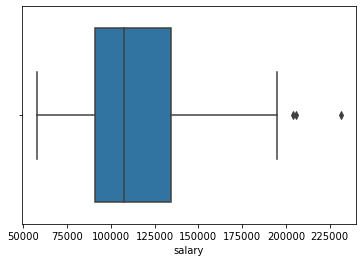

In [43]:
sns.boxplot(df['salary'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


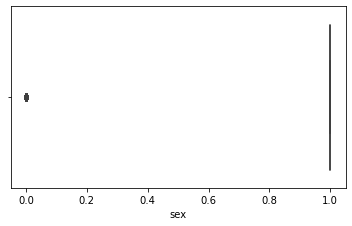

In [44]:
sns.boxplot(df['sex'])
plt.subplots_adjust(bottom=0.25)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


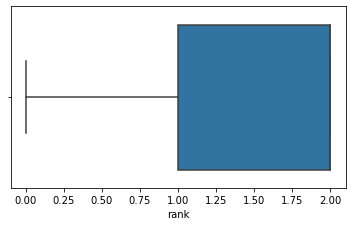

In [45]:
sns.boxplot(df['rank'])
plt.subplots_adjust(bottom=0.25)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


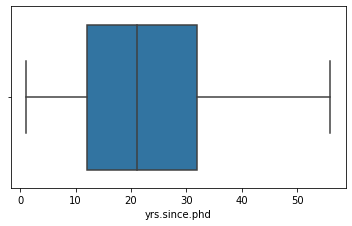

In [46]:
sns.boxplot(df['yrs.since.phd'])
plt.subplots_adjust(bottom=0.25)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


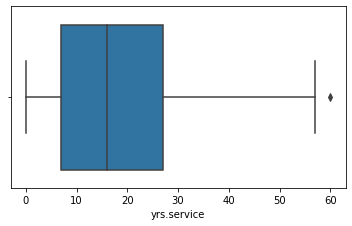

In [47]:
sns.boxplot(df['yrs.service'])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [48]:
from scipy.stats import zscore

In [49]:
(np.abs(zscore(x))<3).all()

False

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


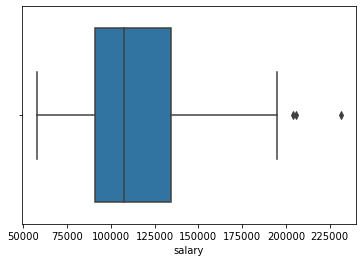

In [50]:
sns.boxplot(df['salary'])
plt.show()

In [51]:
for x in ['salary']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


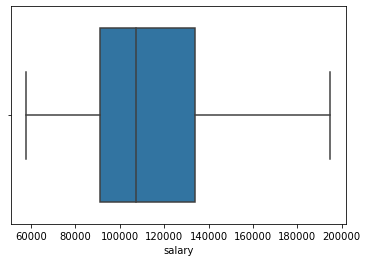

In [52]:
sns.boxplot(df['salary'])
plt.show()

In [53]:
for x in ['sex']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


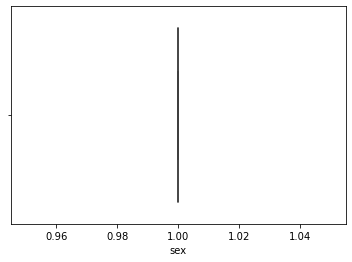

In [54]:
sns.boxplot(df['sex'])
plt.show()

In [55]:
for x in ['yrs.service']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


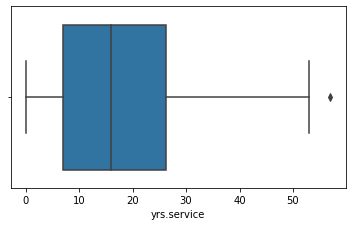

In [56]:
sns.boxplot(df['yrs.service'])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [57]:
#remove outliers

In [58]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18.0,1.0,139750.0
1,2,1,20,16.0,1.0,173200.0
2,1,1,4,3.0,1.0,79750.0
3,2,1,45,39.0,1.0,115000.0
4,2,1,40,41.0,1.0,141500.0


In [59]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,396.000000,358.0,394.000000
mean,1.508816,0.544081,22.314861,17.507576,1.0,112945.225888
std,0.757486,0.498682,12.887003,12.846216,0.0,29091.740021
min,0.000000,0.000000,1.000000,0.000000,1.0,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.0,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.0,107175.000000
75%,2.000000,1.000000,32.000000,26.250000,1.0,133850.000000
max,2.000000,1.000000,56.000000,57.000000,1.0,194800.000000


In [60]:
x = df.drop(['salary'],axis=1)
y = df['salary']

In [61]:
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2,1,19,18.0,1.0
1,2,1,20,16.0,1.0
2,1,1,4,3.0,1.0
3,2,1,45,39.0,1.0
4,2,1,40,41.0,1.0
...,...,...,...,...,...
392,2,0,33,30.0,1.0
393,2,0,31,19.0,1.0
394,2,0,42,25.0,1.0
395,2,0,25,15.0,1.0


In [62]:
y

0      139750.0
1      173200.0
2       79750.0
3      115000.0
4      141500.0
         ...   
392    103106.0
393    150564.0
394    101738.0
395     95329.0
396     81035.0
Name: salary, Length: 397, dtype: float64

In [63]:
#training phase

In [64]:
df.dtypes

rank               int32
discipline         int32
yrs.since.phd      int64
yrs.service      float64
sex              float64
salary           float64
dtype: object

In [65]:
#df['sex'] = df['sex'].float.replace(',','').astype(int)

In [66]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18.0,1.0,139750.0
1,2,1,20,16.0,1.0,173200.0
2,1,1,4,3.0,1.0,79750.0
3,2,1,45,39.0,1.0,115000.0
4,2,1,40,41.0,1.0,141500.0


In [67]:
df.isna().sum()

rank              0
discipline        0
yrs.since.phd     0
yrs.service       1
sex              39
salary            3
dtype: int64

In [67]:
df.isnull().sum()

rank              0
discipline        0
yrs.since.phd     0
yrs.service       1
sex              39
salary            3
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           397 non-null    int32  
 1   discipline     397 non-null    int32  
 2   yrs.since.phd  397 non-null    int64  
 3   yrs.service    396 non-null    float64
 4   sex            358 non-null    float64
 5   salary         394 non-null    float64
dtypes: float64(3), int32(2), int64(1)
memory usage: 15.6 KB


In [69]:
df['salary'].isnull().sum()

3

In [70]:
df['sex'].isnull().sum()

39

In [71]:
df['yrs.service'].isnull().sum()

1

In [72]:
df['salary'] = df['salary'].fillna((df['salary'].mean()))

In [73]:
df['sex'] = df['sex'].fillna((df['sex'].mode()[0]))

In [74]:
df['yrs.service'] = df['yrs.service'].fillna((df['yrs.service'].mean()))

In [75]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.0,397.000000
mean,1.508816,0.544081,22.314861,17.507576,1.0,112945.225888
std,0.757486,0.498682,12.887003,12.829986,0.0,28981.334537
min,0.000000,0.000000,1.000000,0.000000,1.0,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.0,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.0,107300.000000
75%,2.000000,1.000000,32.000000,26.000000,1.0,133700.000000
max,2.000000,1.000000,56.000000,57.000000,1.0,194800.000000


In [77]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           397 non-null    int32  
 1   discipline     397 non-null    int32  
 2   yrs.since.phd  397 non-null    int64  
 3   yrs.service    397 non-null    float64
 4   sex            397 non-null    float64
 5   salary         397 non-null    float64
dtypes: float64(3), int32(2), int64(1)
memory usage: 15.6 KB


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           397 non-null    int32  
 1   discipline     397 non-null    int32  
 2   yrs.since.phd  397 non-null    int64  
 3   yrs.service    397 non-null    float64
 4   sex            397 non-null    float64
 5   salary         397 non-null    float64
dtypes: float64(3), int32(2), int64(1)
memory usage: 15.6 KB


In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
st = StandardScaler()

In [82]:
x_scaled = st.fit_transform(x)

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=41)

In [85]:
x_train.shape

(297, 5)

In [86]:
x_test.shape

(100, 5)

In [87]:
y_train.shape

(297,)

In [88]:
y_test.shape

(100,)

In [89]:
#model training

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           397 non-null    int32  
 1   discipline     397 non-null    int32  
 2   yrs.since.phd  397 non-null    int64  
 3   yrs.service    397 non-null    float64
 4   sex            397 non-null    float64
 5   salary         397 non-null    float64
dtypes: float64(3), int32(2), int64(1)
memory usage: 15.6 KB


In [91]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18.0,1.0,139750.0
1,2,1,20,16.0,1.0,173200.0
2,1,1,4,3.0,1.0,79750.0
3,2,1,45,39.0,1.0,115000.0
4,2,1,40,41.0,1.0,141500.0


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report


In [93]:
lm = LogisticRegression()

In [94]:
lm.fit(x_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
df.info()

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           397 non-null    int32  
 1   discipline     397 non-null    int32  
 2   yrs.since.phd  397 non-null    int64  
 3   yrs.service    397 non-null    float64
 4   sex            397 non-null    float64
 5   salary         397 non-null    float64
dtypes: float64(3), int32(2), int64(1)
memory usage: 15.6 KB


In [ ]:
df.info()